# Final Group Project: Predict Life expectancy

**Project Info:**
- The dataset is getting from __[Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data)__
- Contributors
    - Priyanka
    - Rohit
    - Grant

## Data Pre-Processing

### Load Data
Load from the data stored in **Github repository** so that each team member can directly run the code.<br>
__[Tutorial: How to read a CSV file from GitHub on Jupyter Notebook](https://www.youtube.com/watch?v=4xXBDXDSFts)__

In [1]:
# imort library
import pandas as pd

In [2]:
# Load data: load file from github repository
data = pd.read_csv('https://raw.githubusercontent.com/GrantCa24/DA_Group6-Final_Project/main/data_raw/Life%20Expectancy%20Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data Assessment

**Highlights:**
- There are 2938 rows, 22 columns
- Remove leading and trailing characters
    - __[`Series.str.strip()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html)__
- Rename column name
    - Base on the discussion as the link here: __[1-19 years: typo in the column header](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/discussion/276334)__ we decided to rename the header name
- No duplicate
- Dirty Data: Several columns has max value which does not make sense

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 10-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

In [3]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
# Remove spaces at the beginning and at the end of the headers(string)
data.columns = data.columns.str.strip()
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [5]:
# Rename column 1-19 years to 10-19 years
data.rename(columns={'thinness  1-19 years': 'thinness 10-19 years'}, inplace=True) # modify the DataFrame

In [6]:
# Final check after renaming column
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# Check the total of rows and columns)
rows, columns = data.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 2938, Columns: 22


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Check Duplicates

There is **no duplicate** need to handle.

In [9]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


### Check and Remove Null values in all the columns and rows

1. **Dropna**: We decided to drop null value of the columns that has null value lower than 10%
    - Columns: `Life expectancy`, `Adult Mortality`, `Alcohol`, `BMI`, `Polio`, `Total expenditure`, `Diphtheria`, `thinness 10-19 years`, `thinness 5-9 years`, `Income composition of resources`, `Schooling`
    - Reason: These null value is only a small portion compared with the whole dataset, thus it won't affect much with the analysis after we drop them.

2. **Imputation**: We decided to imputate those columns that has null value with 10% \~ 20% with mean value by `Status` 
    - Columns: `Hepatitis B` and `GDP`
    - Reason: The amount of missing value is large, but is not that huge to affect overall after imputation. And we believe `Status` is a great categorical indicator to imputate, considering the time and effort.

    - Notes: We attemp to inpute these two columns by each country and take the moving average. But after examine the data in detail, it will be too complicated and time-consuming.

3. **Delete column**: We decided to delete those columns that has null value over 20%
    - Column: `Population` 22.19% null value

    - Reason: The amount of missing value is too large, which after imputation will affect a lot of the dataset.

**Strategy:**
1. Drop all the rows that contain null value
2. Imputate the remaining null value with mean value by `Status`
3. Delete column

**Notes:**
- Year range from 2000~2015 in the dataset

#### Null value count & percentage

In [10]:
# Checking for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [11]:
missing_percentage = missing_values * 100 / len(data)
print(missing_percentage)

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness 10-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<class 'method'>


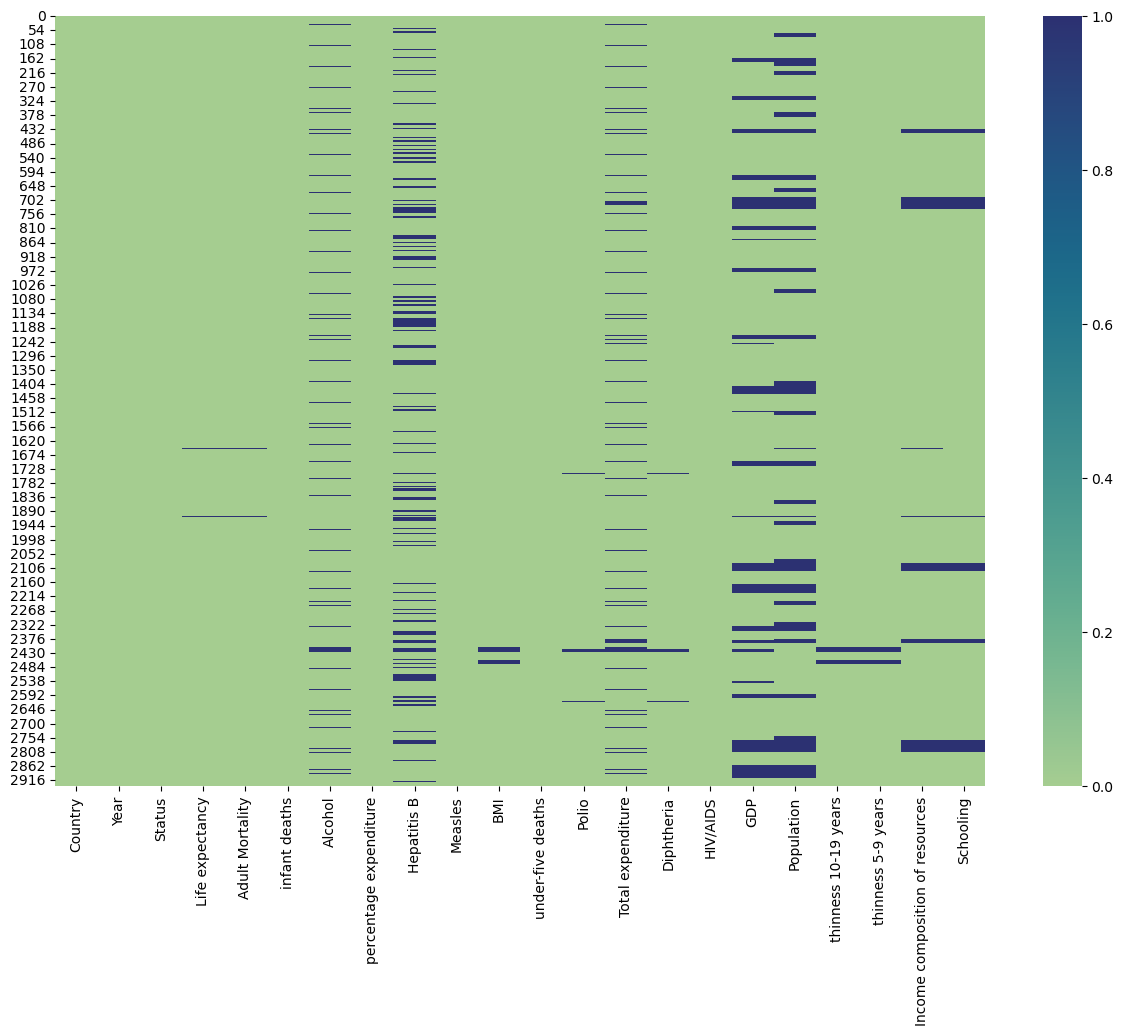

In [13]:
print(type(data.isnull))
#visual representation of missing values in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(), cmap = 'crest')
plt.show()

#### Strategy Step1:
**Drop all the rows that contain null value.**

In [14]:
# Strategy Step1: Drop all the rows that contain null value
data.dropna(
    subset=['Life expectancy', 'Adult Mortality', 'Alcohol', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'thinness 10-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
    inplace=True)
# Show the remaing columns that have null values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        473
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                255
Population                         453
thinness 10-19 years                 0
thinness 5-9 years                   0
Income composition of resources      0
Schooling                            0
dtype: int64

In [15]:
data['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

#### Strategy Step2. Imputate the remaining null value with mean value by `Status`

##### Hepatitis B

In [16]:
null_hep_b = data[data['Hepatitis B'].isnull()]
null_hep_b_country = null_hep_b['Country'].unique()

In [17]:
for country in null_hep_b_country:
    null_hep_b_country = null_hep_b[null_hep_b['Country'] == country]
    print(country, ":")
    print(null_hep_b_country['Year'].unique())

Algeria :
[2003 2002 2001 2000]
Angola :
[2006 2005 2004 2003 2002 2001 2000]
Antigua and Barbuda :
[2000]
Argentina :
[2001 2000]
Australia :
[2000]
Azerbaijan :
[2001 2000]
Bahamas :
[2000]
Bangladesh :
[2002 2001 2000]
Barbados :
[2000]
Benin :
[2001 2000]
Bosnia and Herzegovina :
[2003 2002 2001 2000]
Burkina Faso :
[2005 2004 2003 2002 2001 2000]
Burundi :
[2003 2002 2001 2000]
Cabo Verde :
[2001 2000]
Cambodia :
[2005 2004 2003 2002 2001 2000]
Cameroon :
[2004 2003 2002 2001 2000]
Canada :
[2002 2001 2000]
Central African Republic :
[2008 2007 2006 2005 2004 2003 2002 2001 2000]
Chad :
[2007 2006 2005 2004 2003 2002 2001 2000]
Chile :
[2005 2004 2003 2002 2001 2000]
Comoros :
[2002 2001 2000]
Congo :
[2006 2005 2004 2003 2002 2001 2000]
Croatia :
[2006 2005 2004 2003 2002 2001 2000]
Denmark :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Djibouti :
[2006 2005 2004 2003 2002 2001 2000]
Equatorial Guinea :
[2013 2012 2011 2010 2009 2008 2007 2006 200

##### GDP

In [18]:
null_gdp = data[data['GDP'].isnull()]
null_gdp_country = null_gdp['Country'].unique()

In [19]:
for country in null_gdp_country:
    null_gdp_country = null_gdp[null_gdp['Country'] == country]
    print(country, ":")
    print(null_gdp_country['Year'].unique())

Bahamas :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Bolivia (Plurinational State of) :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Congo :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Egypt :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Eritrea :
[2014 2013 2012]
Gambia :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Iran (Islamic Republic of) :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Iraq :
[2003]
Kyrgyzstan :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Lao People's Democratic Republic :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Libya :
[2014 2013 2012]
Micronesia (Federated States of) :
[2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001
 2000]
Saint Lucia :
[2014 2013 2012 2011 2010 2009 2008 

##### Mean value of `Hepatitis B` & `GDP` by `Status`
- __[`mean()` will exclude null value as default](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)__

In [20]:
# Impute with Developed / Developing country's median value

#Create a groupby object
data_group = data.groupby('Status')

#Select only required columns
data_columns = data_group[['Hepatitis B', 'GDP']]

#Apply aggregate function
hep_B_gdp_by_status = data_columns.mean()

hep_B_gdp_by_status

,Hepatitis B,GDP
Status,,
Developed,87.864111,22427.948354
Developing,79.801782,4288.693944


##### Fill null value (Imputate with Mean)

In [21]:
# Fill missing values for 'Hepatitis B' based on 'Status'
data.loc[data['Status'] == 'Developed', 'Hepatitis B'] = data.loc[data['Status'] == 'Developed', 'Hepatitis B'].fillna(
    hep_B_gdp_by_status.loc['Developed','Hepatitis B'])
data.loc[data['Status'] == 'Developing', 'Hepatitis B'] = data.loc[data['Status'] == 'Developing', 'Hepatitis B'].fillna(
    hep_B_gdp_by_status.loc['Developing','Hepatitis B'])

In [22]:
# Fill missing values for 'GDP' based on 'Status'
data.loc[data['Status'] == 'Developed', 'GDP'] = data.loc[data['Status'] == 'Developed', 'GDP'].fillna(
    hep_B_gdp_by_status.loc['Developed','GDP'])
data.loc[data['Status'] == 'Developing', 'GDP'] = data.loc[data['Status'] == 'Developing', 'GDP'].fillna(
    hep_B_gdp_by_status.loc['Developing','GDP'])

#### Strategy Step3. Delete column: Population

In [23]:
null_population = data[data['Population'].isnull()]
null_population_country = null_population['Country'].unique()

In [24]:
# Drop Population
data.drop(columns=['Population'], inplace=True)

# Show the null value across columns
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Remove Dirty Data

__[Warning from the discussion](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/discussion/161872)__
- Filter out the observations of the value > 1000 of three columns which is measured by `per 1000 population`
    - `infant death`
    - `Measles`
    - `under-five deaths`

In [25]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.00000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,2007.028951,69.323905,162.341549,29.721049,4.554276,846.825339,81.173892,2253.750000,38.228091,41.168623,82.86385,5.867973,82.762520,1.838146,7375.773626,4.906651,4.945305,0.628416,12.060603
std,4.319521,9.397971,124.228069,123.168632,4.011385,2109.803754,22.610377,10778.382964,19.755899,167.717366,22.92121,2.374123,23.171621,5.374554,13851.851296,4.508649,4.600552,0.208776,3.211195
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.00000,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.675000,73.000000,0.000000,0.860000,19.152439,79.801782,0.000000,19.100000,0.000000,78.00000,4.260000,79.000000,0.100000,519.334821,1.600000,1.600000,0.494000,10.200000
50%,2007.000000,72.200000,142.500000,3.000000,3.775000,103.447422,87.864111,15.000000,43.800000,3.000000,93.00000,5.705000,93.000000,0.100000,2528.787928,3.350000,3.350000,0.677000,12.300000
75%,2011.000000,75.400000,224.000000,19.000000,7.530000,547.081536,96.000000,339.250000,55.800000,24.000000,97.00000,7.440000,97.000000,0.700000,5422.063855,7.300000,7.300000,0.779000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.100000,2500.000000,99.00000,14.390000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.945000,20.700000


#### Filter out dirty data which measured by `per 1000 population`

In [26]:
# value of infant deaths, Measles, and under-five deaths should be <= 1000
cols = ["infant deaths", "Measles", "under-five deaths"]

# Filter out rows where any of the specified columns have values > 1,000
data = data[(data[cols] <= 1000).all(axis=1)] # Filter and remain those <= 1000

In [27]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,2007.289698,70.473157,154.528828,9.542533,4.814338,950.819702,82.898533,89.054348,40.892817,13.330340,85.164934,6.014532,85.089319,1.691777,8207.181902,4.219423,4.228355,0.647058,12.490312
std,4.231449,8.935895,120.401879,23.119559,4.039873,2245.785982,21.946876,189.429364,19.310553,34.198019,21.485995,2.402472,21.727608,5.421282,14627.049439,3.627277,3.685654,0.209570,3.071708
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.900000,0.000000,3.000000,0.370000,2.000000,0.100000,5.668726,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,65.475000,71.000000,0.000000,1.160000,21.516640,79.801782,0.000000,23.300000,0.000000,83.750000,4.380000,84.000000,0.100000,666.718551,1.500000,1.500000,0.546000,10.700000
50%,2007.000000,72.900000,136.000000,2.000000,4.120000,152.590865,89.000000,3.000000,47.000000,2.000000,94.000000,5.910000,94.000000,0.100000,3306.238688,3.000000,3.100000,0.699000,12.700000
75%,2011.000000,76.100000,214.000000,9.000000,7.770000,646.487373,96.000000,64.000000,56.700000,11.000000,97.000000,7.630000,97.000000,0.500000,6549.973459,6.425000,6.400000,0.791000,14.500000
max,2015.000000,89.000000,723.000000,549.000000,17.870000,19479.911610,99.000000,999.000000,77.100000,879.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,19.700000,19.900000,0.945000,20.700000


In [28]:
# Show the remaing columns that have null values
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [29]:
data.shape

(2116, 21)

## Exploratory Data Analysis (EDA)

**Highlights:**
- `Life expectancy`: Life expectancy reaches a peak in the **70-80 year range**, as seen in the histogram. The boxplot reveals that **more than 50% of the population lives beyond 70 years**, with the maximum life expectancy nearing 90 years. The median life expectancy is just above 70 years, indicating a generally high life expectancy. However, 25% of the population has a life expectancy of less than 65 years, with **several outliers living less than 50 years**. This reflects that while overall life expectancy is high, there are notable disparities, with a portion of the population suffering from significantly lower life expectancy. 
- **Right skew ( > 1)**: `under-five deaths`, `infant deaths` , `HIV/AIDS`, `percentage expenditure`, `GDP`, `Measles`, `Adult Mortality`, `thinness 5-9 years`, `thinness 10-19 years`
- **Left skew ( < -1)**: `Income composition of resources`, `Hepatitis B`, `Polio`, `Diphtheria`

<br>

**Methods:**
- `pandas.DataFrame.hist` : Only **numerical columns** will be plotted. __[Here for more info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)__
- `subplot(nrows, ncols, index)` __[Here for more info](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)__
- `kdeplot` : Only **numerical columns** will be plotted. __[Here for more info](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)__

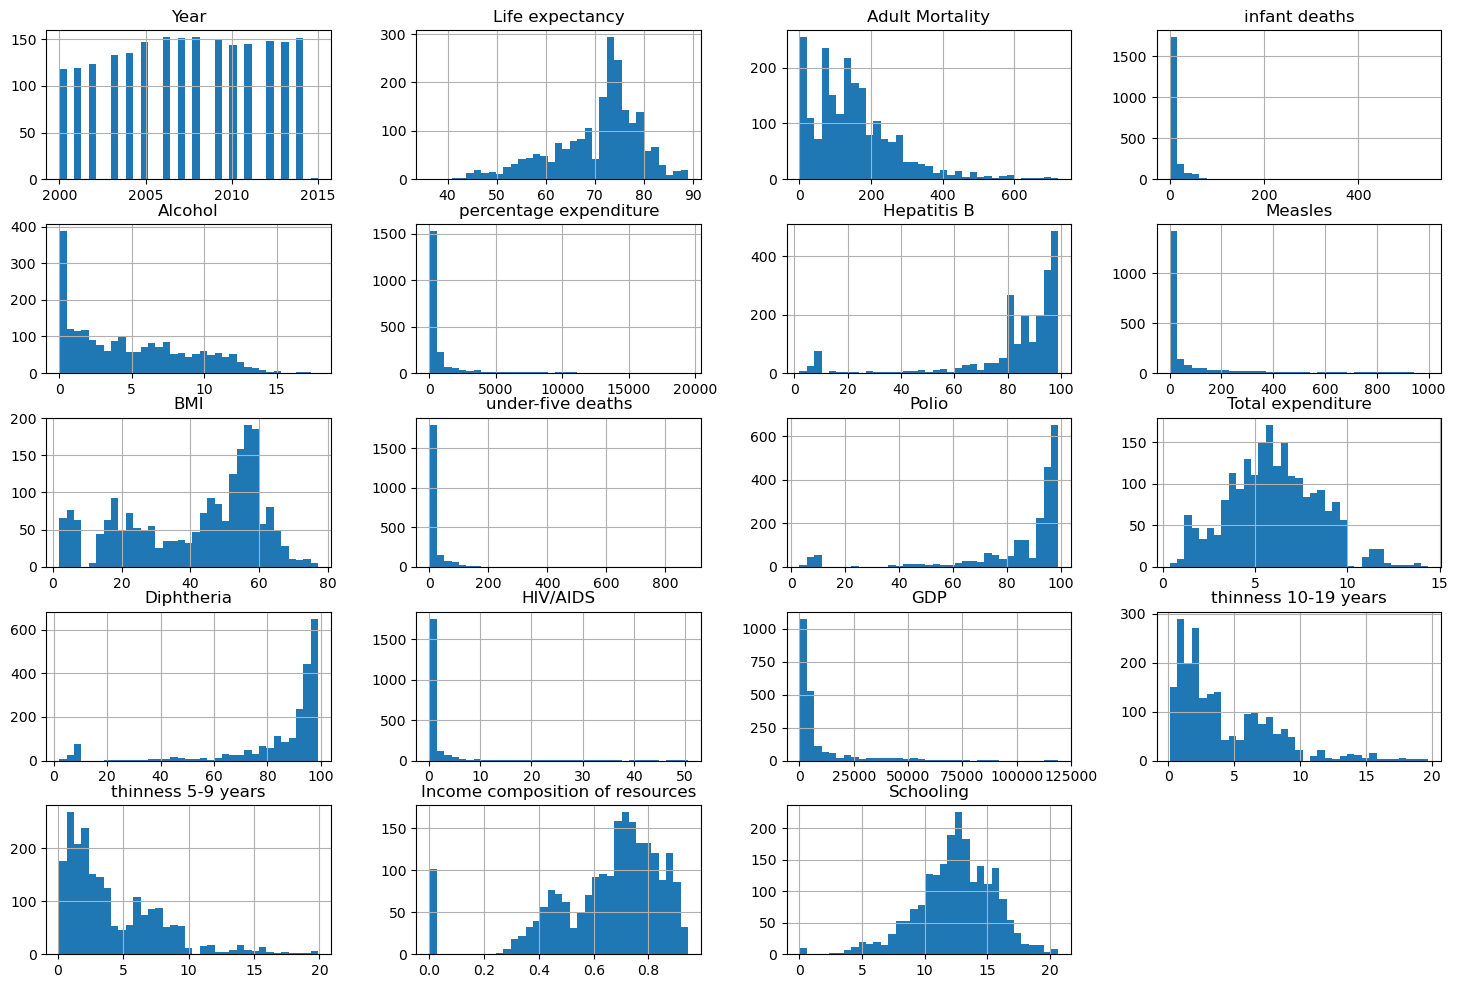

In [30]:
# Check the histograms
data.hist(bins=35, figsize=(18, 12))
plt.show()

In [31]:
num_cols = data.select_dtypes("number").columns # select all numeric types
print(f"There are {len(cols)} numeric columns: \n {cols}")

non_num_cols = data.select_dtypes(exclude=['int64', 'float64']).columns # select all numeric types
print(f"There are {len(non_num_cols)} non numeric columns: \n {non_num_cols}")

There are 3 numeric columns: 
 ['infant deaths', 'Measles', 'under-five deaths']
There are 2 non numeric columns: 
 Index(['Country', 'Status'], dtype='object')


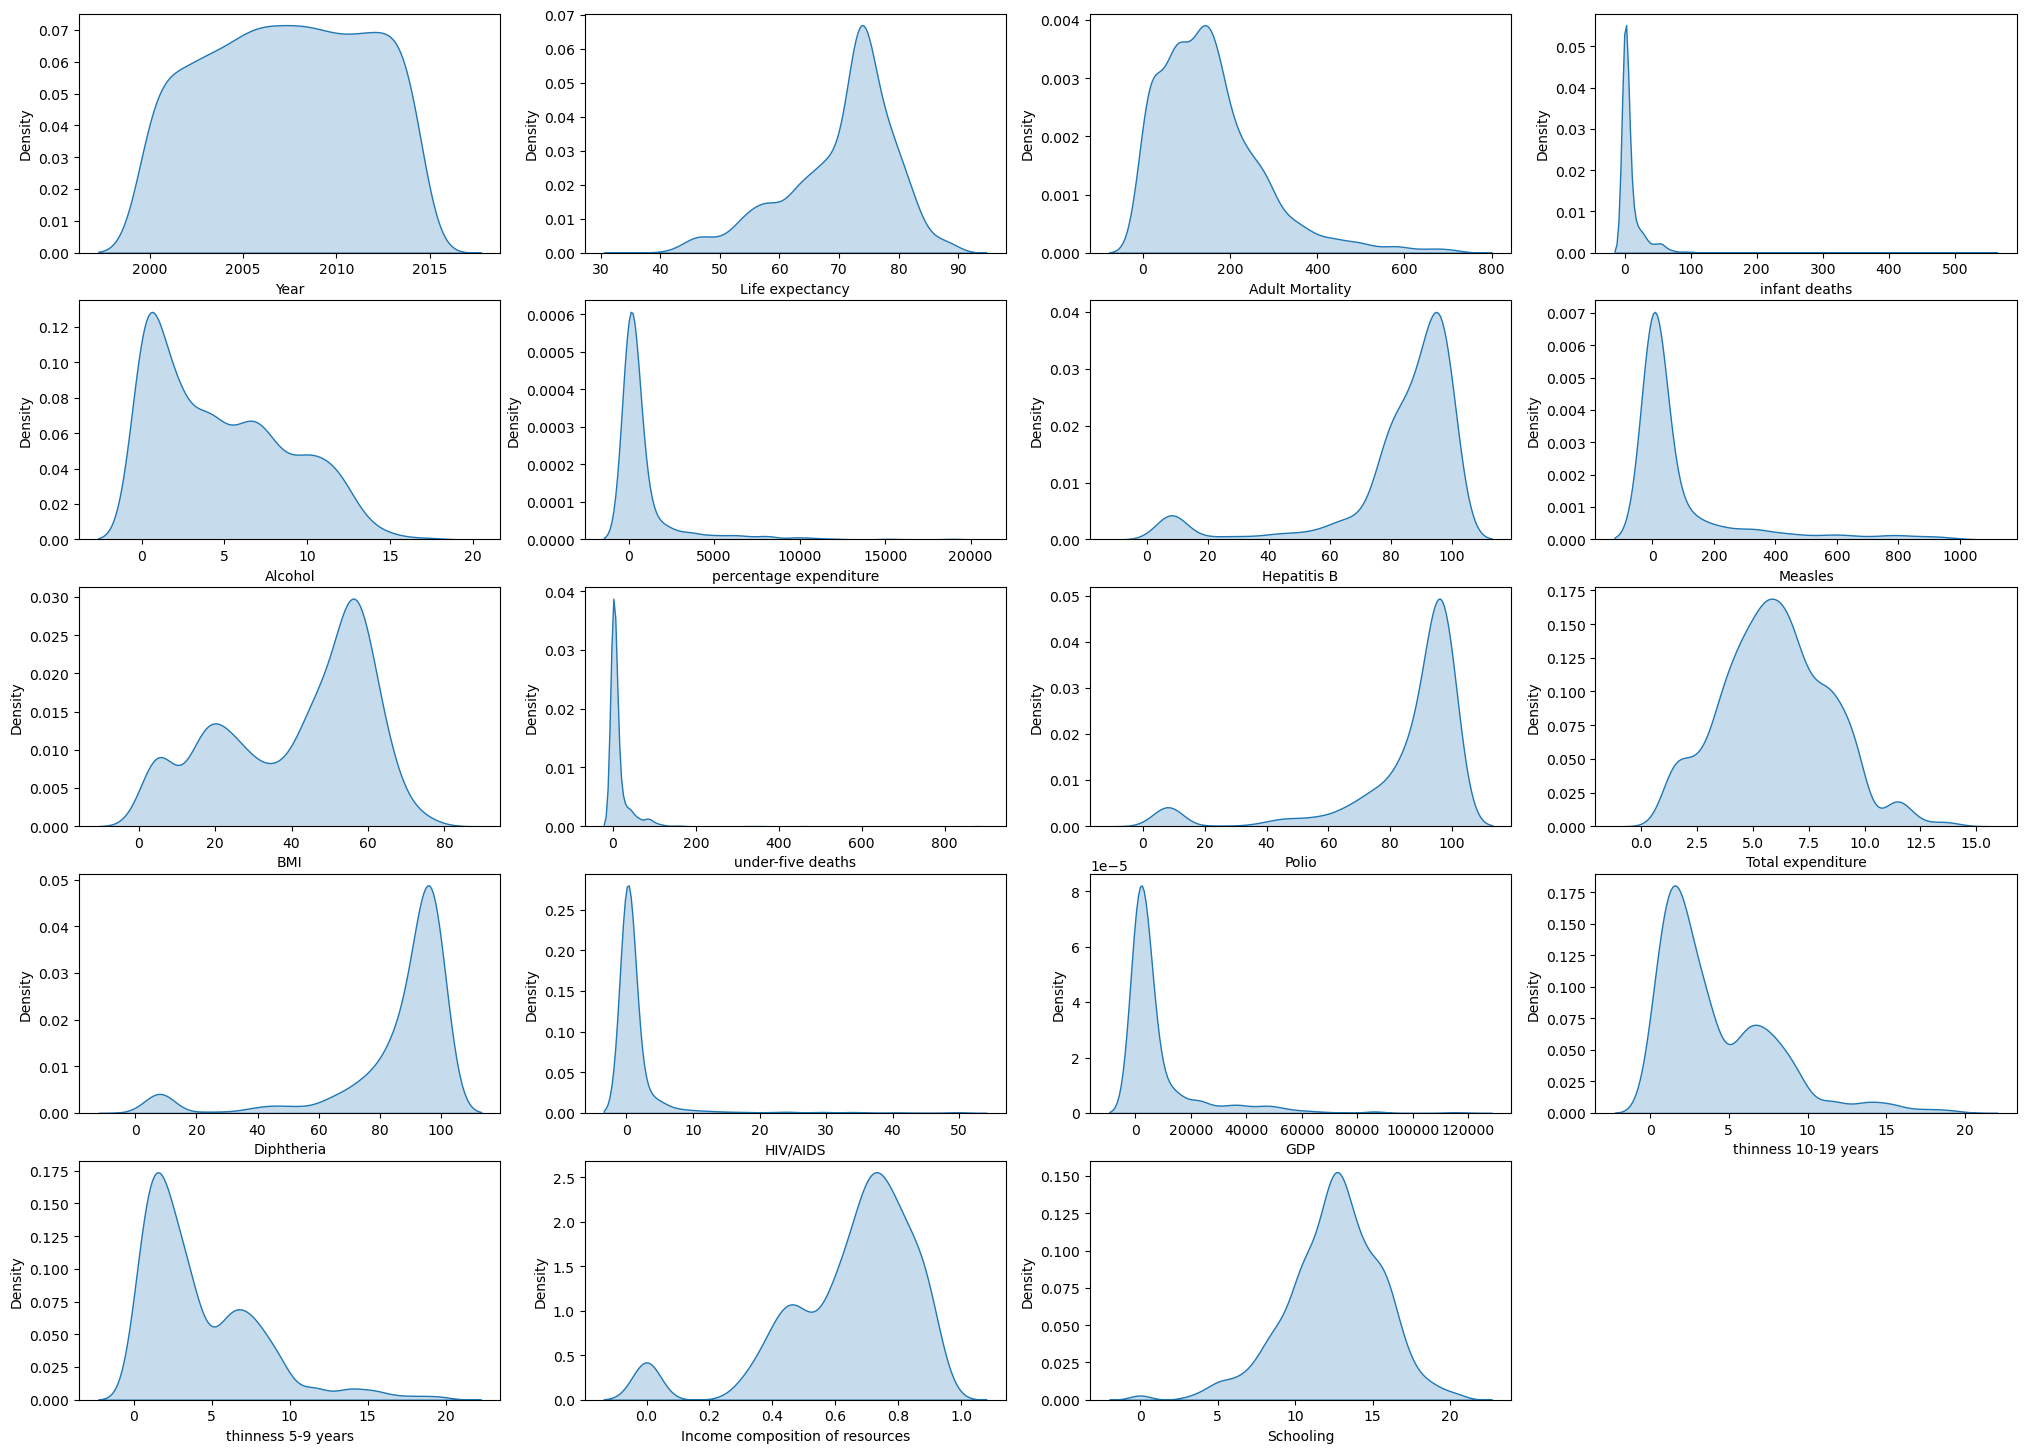

In [32]:
fig = plt.figure(figsize=(25,18))

graph_index = 1 # Set the position of the subplot to 1
for col in num_cols:
    plt.subplot(5, 4, graph_index) # subplot(nrows, ncols, index)
    graph = sns.kdeplot(data = data, x = col, fill = True)
    graph_index += 1 # Set the position to the next one

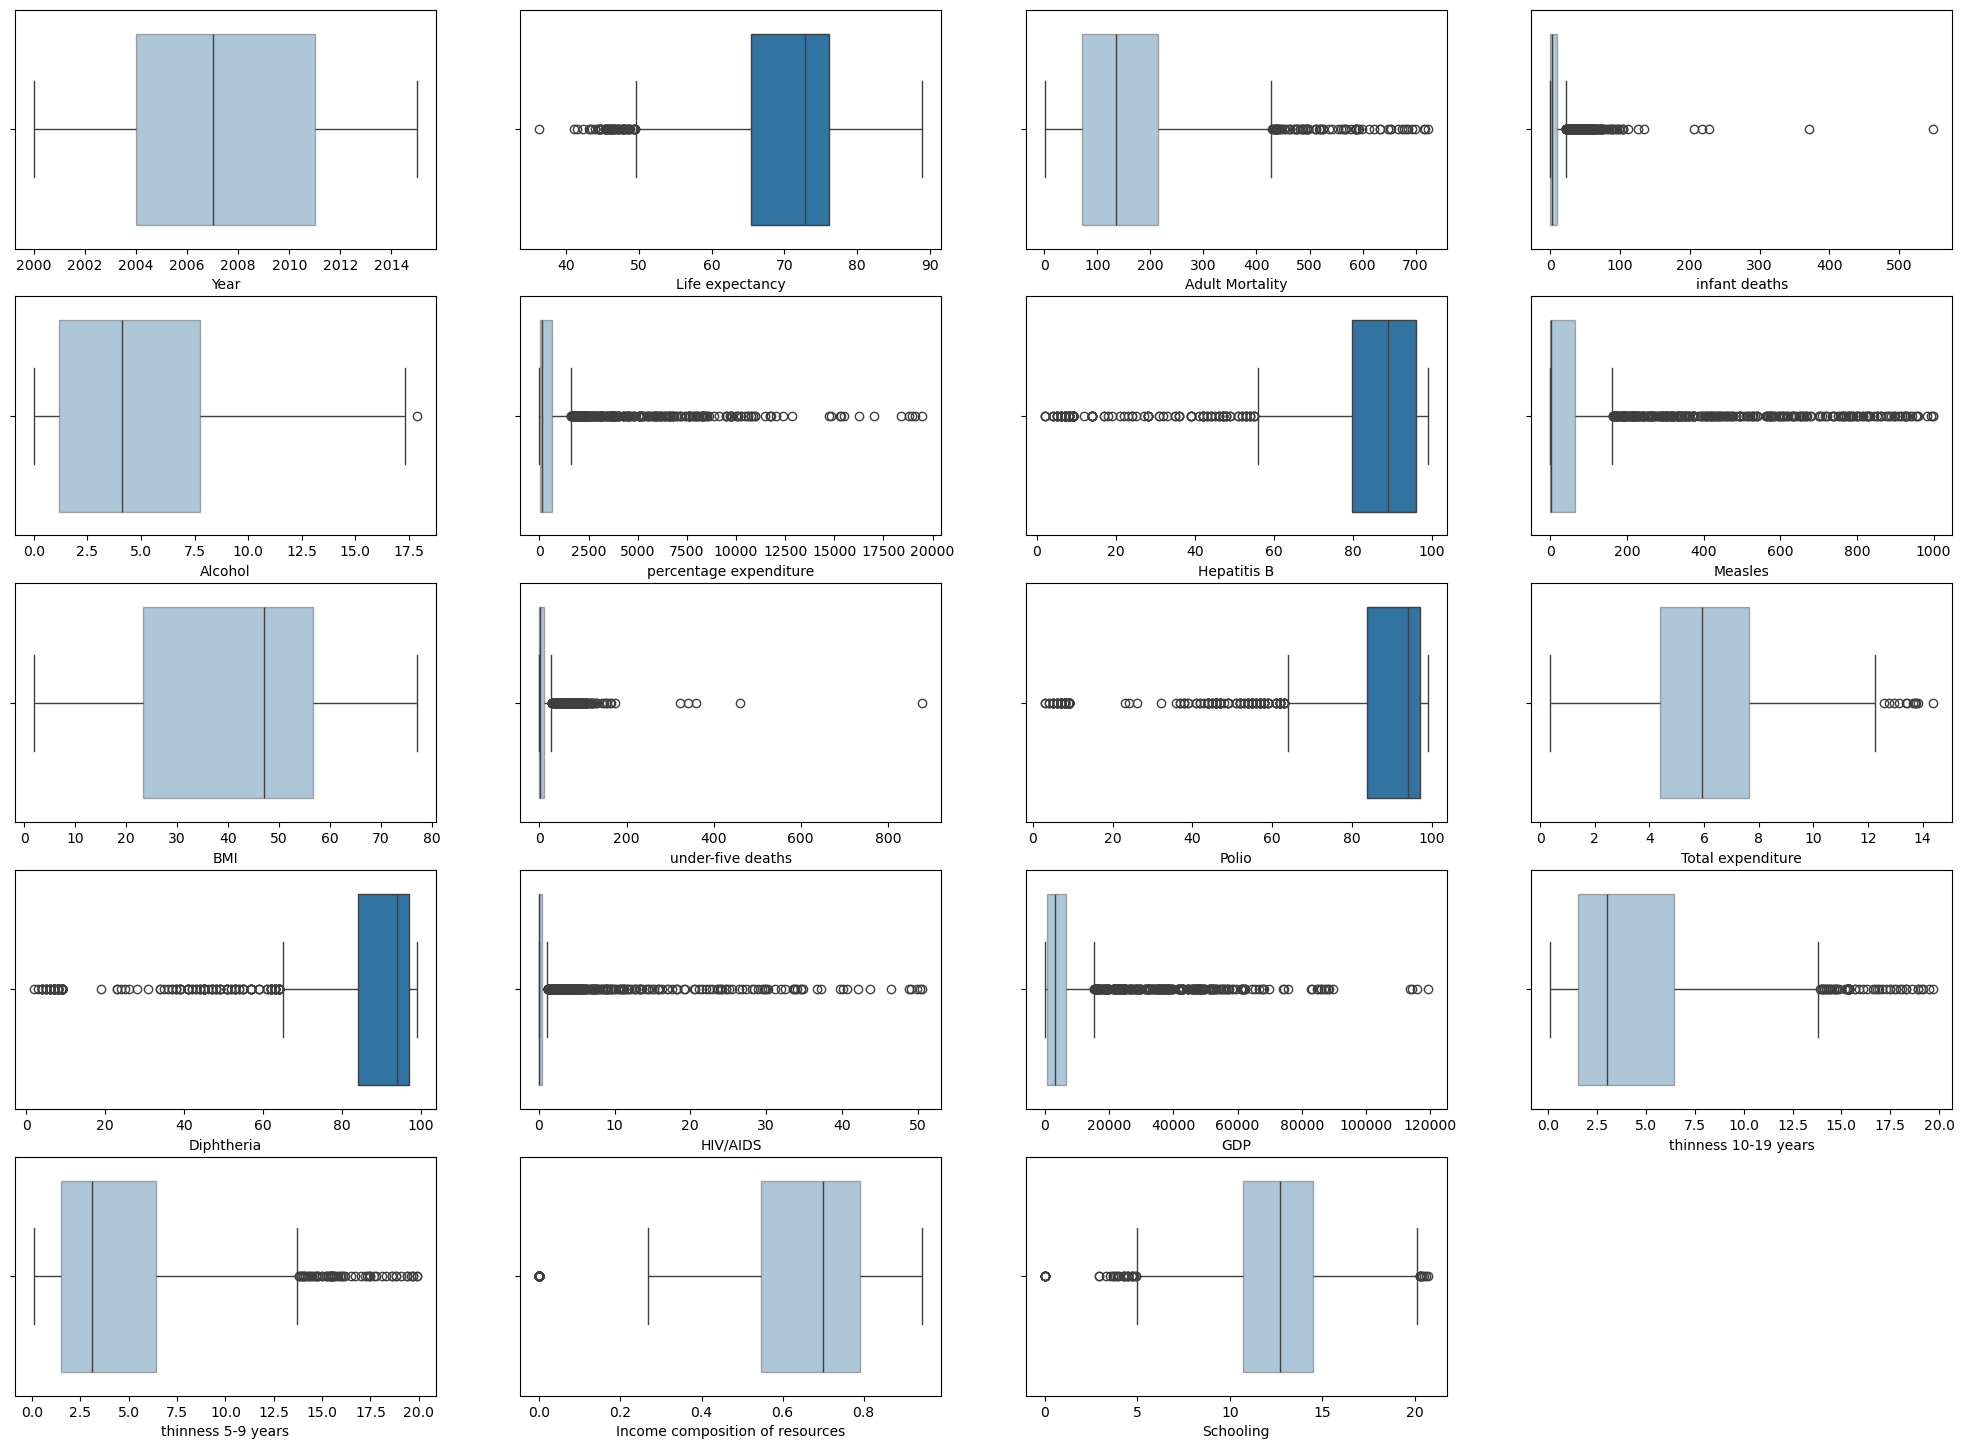

In [33]:
fig = plt.figure(figsize=(25,18))

boxplot_index = 1 # Set the position of the subplot to 1
for col in num_cols:
    plt.subplot(5, 4, boxplot_index) # subplot(nrows, ncols, index)
    # The higher the better (Life expectancy & immunization coverage)
    if col in ['Life expectancy', 'Hepatitis B', 'Polio', 'Diphtheria']:
        boxplot = sns.boxplot(data=data, x=col, boxprops=dict(alpha=1))  # Set alpha for transparency
    else:
        boxplot = sns.boxplot(data=data, x=col, boxprops=dict(alpha=0.4))  # Set alpha for transparency
    boxplot_index += 1 # Set the position to the next one

In [34]:
data.skew(axis = 0, skipna=True, numeric_only=True).sort_values(ascending=False) # Skewness in each numeric column with ascending order

under-five deaths                  10.915107
infant deaths                       9.856964
HIV/AIDS                            5.446009
percentage expenditure              4.081094
GDP                                 3.152884
Measles                             2.751477
Adult Mortality                     1.441994
thinness 5-9 years                  1.421534
thinness 10-19 years                1.365540
Alcohol                             0.538470
Total expenditure                   0.207527
Year                               -0.068239
BMI                                -0.513558
Schooling                          -0.545959
Life expectancy                    -0.838288
Income composition of resources    -1.362920
Hepatitis B                        -2.383773
Polio                              -2.514604
Diphtheria                         -2.515658
dtype: float64

- **Positive** value: The distribution is skewed to the **right**.
- **Negative** value: The distribution is skewed to the **left**.
- **0**: **Perfect normal distribution**.

### 🔓Synthetic data
**Adding synthetic data for unbiased data** <br>
Resources:
- __[imbalanced-learn documentation](https://imbalanced-learn.org/stable/)__
- __[YouTube tutorial](https://www.youtube.com/watch?v=4SivdTLIwHc)__

As we further analyze, we found out that in a total of 168 countries:
- Developed: **29** (with 406 observations)
- Developing: **139** (with 1710 observations)

This finding can explain why the box plot has so many outliers in some degree

In [35]:
country_status = data.groupby('Country')['Status'].value_counts()
country_status # Type: Series

Country                             Status    
Afghanistan                         Developing     4
Albania                             Developing    16
Algeria                             Developing    10
Angola                              Developing     4
Antigua and Barbuda                 Developing    15
                                                  ..
Venezuela (Bolivarian Republic of)  Developing    14
Viet Nam                            Developing     6
Yemen                               Developing     9
Zambia                              Developing    10
Zimbabwe                            Developing    13
Name: count, Length: 168, dtype: int64

In [36]:
# Count the number of unique countries
num_countries = country_status.index.get_level_values('Country').nunique()
print(f'Number of unique countries: {num_countries}')

Number of unique countries: 168


In [37]:
# Count the total number of countries in each status group
countries_per_status = country_status.groupby('Status').size()

# Group by 'Status' and then count the number of unique countries in each group
#countries_per_status = country_status.groupby('Status').apply(lambda x: x.index.get_level_values('Country').nunique())

print(countries_per_status)

Status
Developed      29
Developing    139
Name: count, dtype: int64


In [38]:
# Count the total number of observations in each status group
observations_per_status = country_status.groupby('Status').sum()
observations_per_status

Status
Developed      406
Developing    1710
Name: count, dtype: int64

In [39]:
# Combine the results into a DataFrame
status_summary = pd.DataFrame({'# of Countries': countries_per_status, '# of Observations': observations_per_status})

print(status_summary)

            # of Countries  # of Observations
Status                                       
Developed               29                406
Developing             139               1710


Use over sampling method and apply to `data_resampled`
- Make the observation of developed become the same as developing: 1701
- Drop `Country` column since in the linear regression model, we would only use numerical data
- As a result, `data_resampled` has 3420 rows and 20 columns

#### Resampling: Apply one-hot encoding to `Country`

In [40]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# One-hot encode the 'Country' column
data_encoded = pd.get_dummies(data, columns=['Country'])

# Separate features and target variable
X = data_encoded.drop(['Status'], axis=1)  # Drop the target column 'Status'
y = data_encoded['Status']  # Target variable

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data into a DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Status'] = y_resampled

# Display the count of each unique value in the 'Status' column after resampling
print(data_resampled['Status'].value_counts())

Status
Developing    1710
Developed     1710
Name: count, dtype: int64


C:\Users\stgra\AppData\Local\Temp\ipykernel_151212\2077319892.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_resampled['Status'] = y_resampled


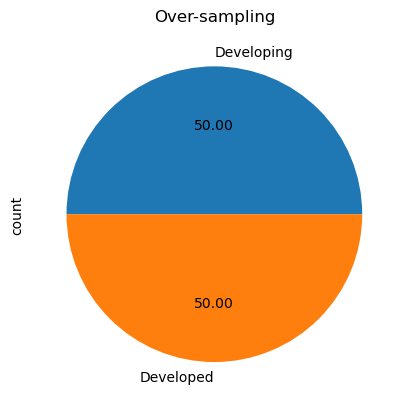

In [41]:
# Show pie plot
pie_plot = y_resampled.value_counts().plot.pie(autopct='%.2f')
title = pie_plot.set_title("Over-sampling")

In [43]:
print(data_resampled.head())

   Year  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0  2014             59.9            271.0             64     0.01   
1  2013             59.9            268.0             66     0.01   
2  2004             57.0            293.0             87     0.02   
3  2003             56.7            295.0             87     0.01   
4  2015             77.8             74.0              0     4.60   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  ...  \
0               73.523582         62.0      492  18.6                 86  ...   
1               73.219243         64.0      430  18.1                 89  ...   
2               15.296066         67.0      466  13.8                120  ...   
3               11.089053         65.0      798  13.4                122  ...   
4              364.975229         99.0        0  58.0                  0  ...   

   Country_United Arab Emirates  Country_Uruguay  Country_Uzbekistan  \
0                         

In [44]:
# Check the (row, column) of data_resampled
data_resampled.shape

(3420, 188)

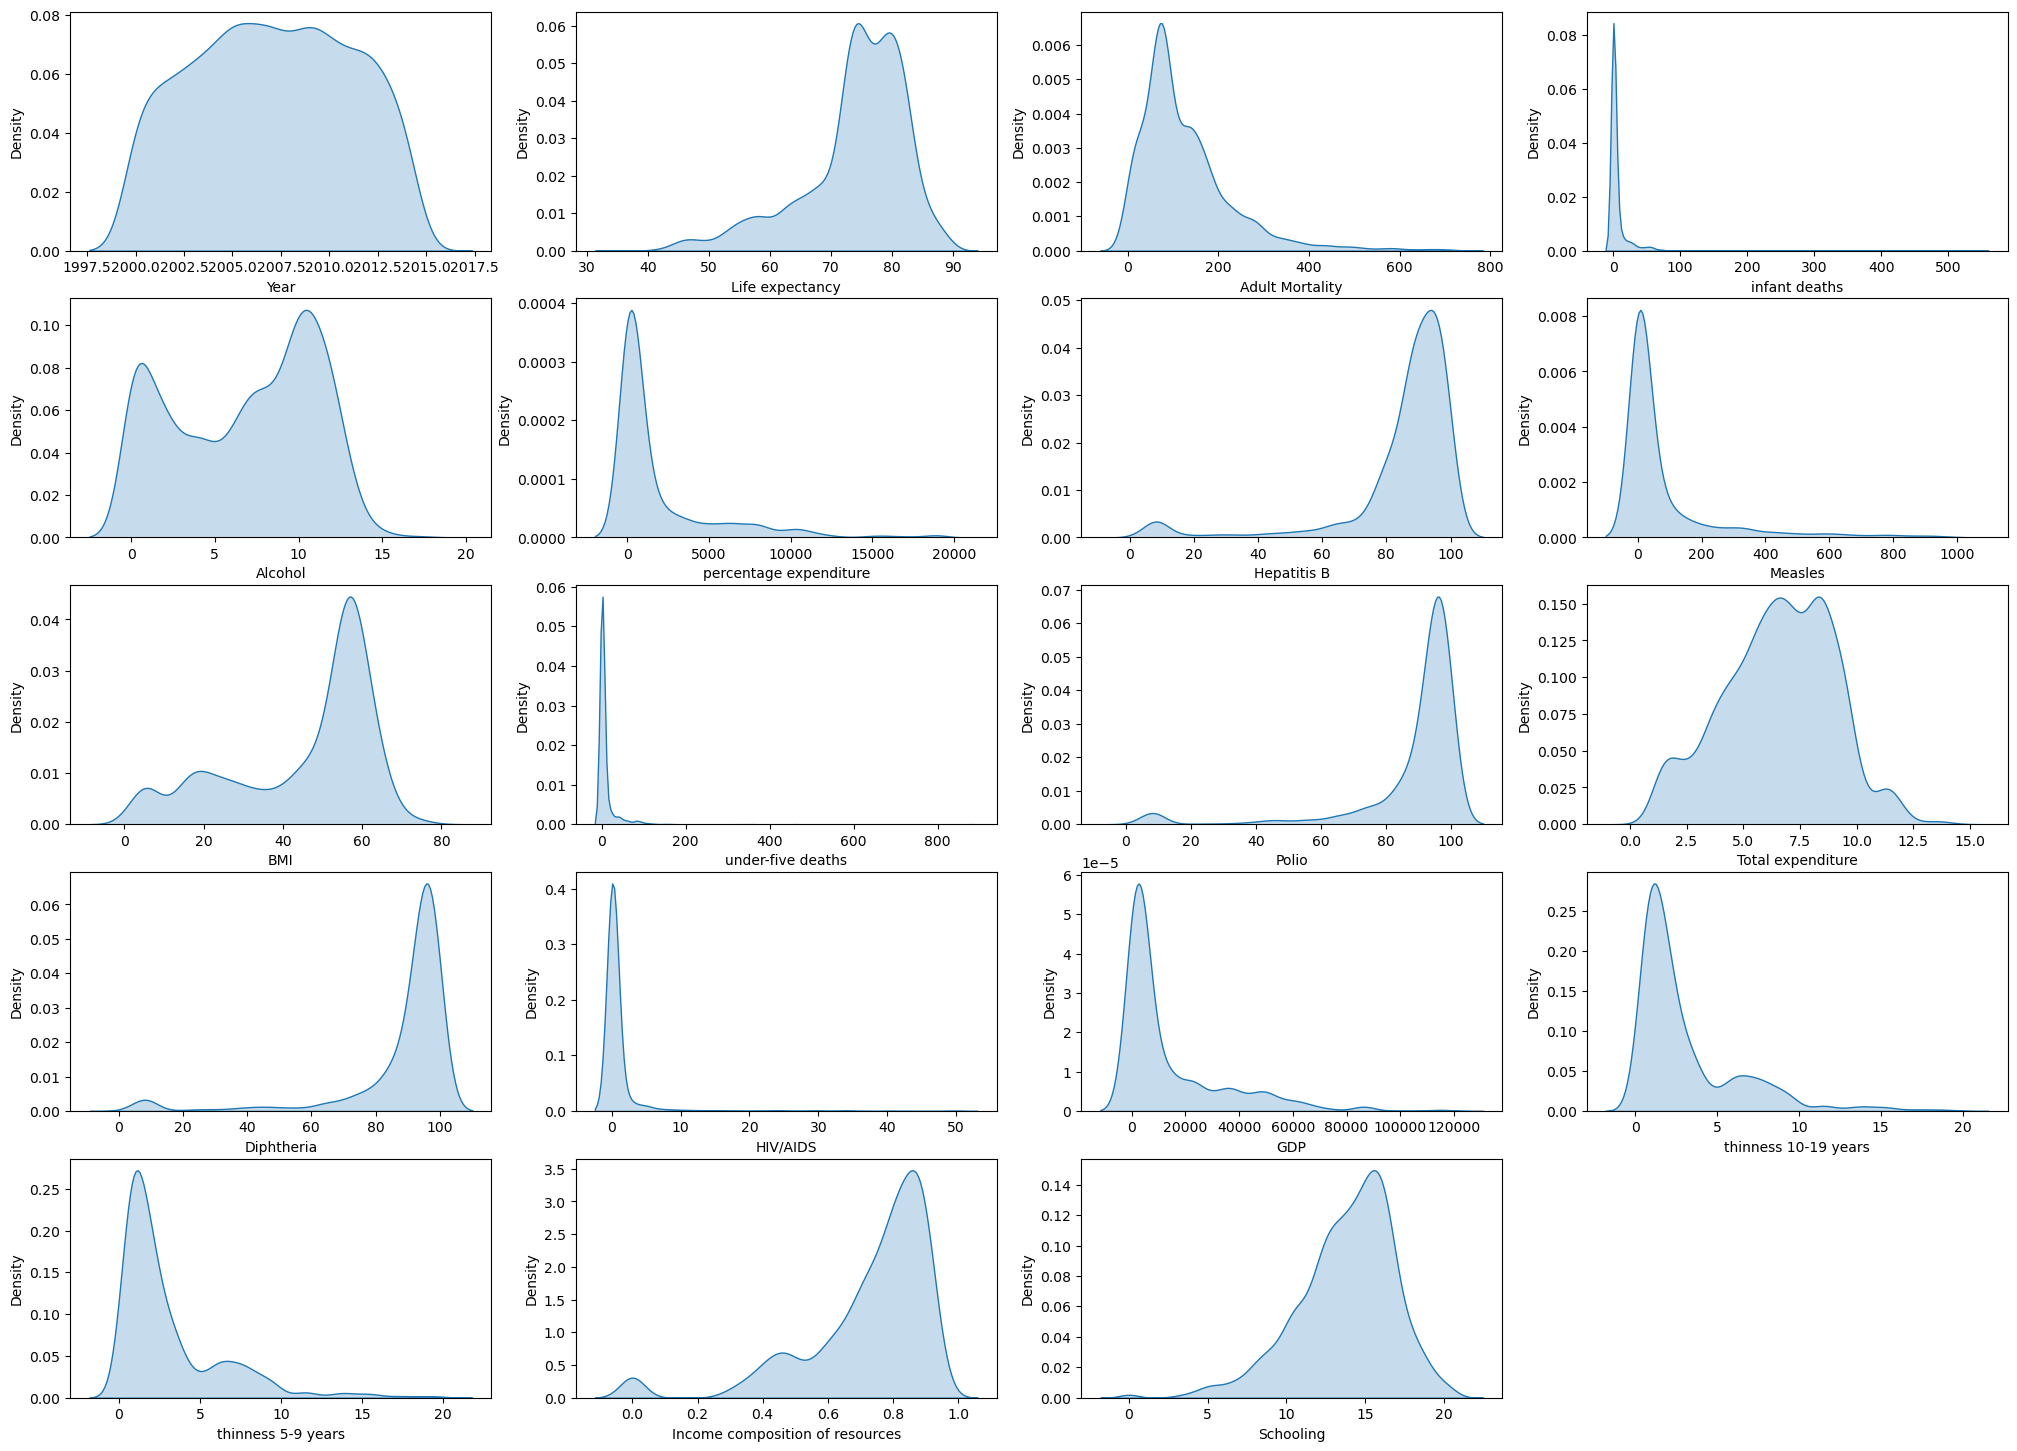

In [45]:
# KDE plot resample data: continuous features
fig = plt.figure(figsize=(25,18))

graph_index = 1 # Set the position of the subplot to 1
for col in num_cols:
    plt.subplot(5, 4, graph_index) # subplot(nrows, ncols, index)
    graph = sns.kdeplot(data = data_resampled, x = col, fill = True)
    graph_index += 1 # Set the position to the next one

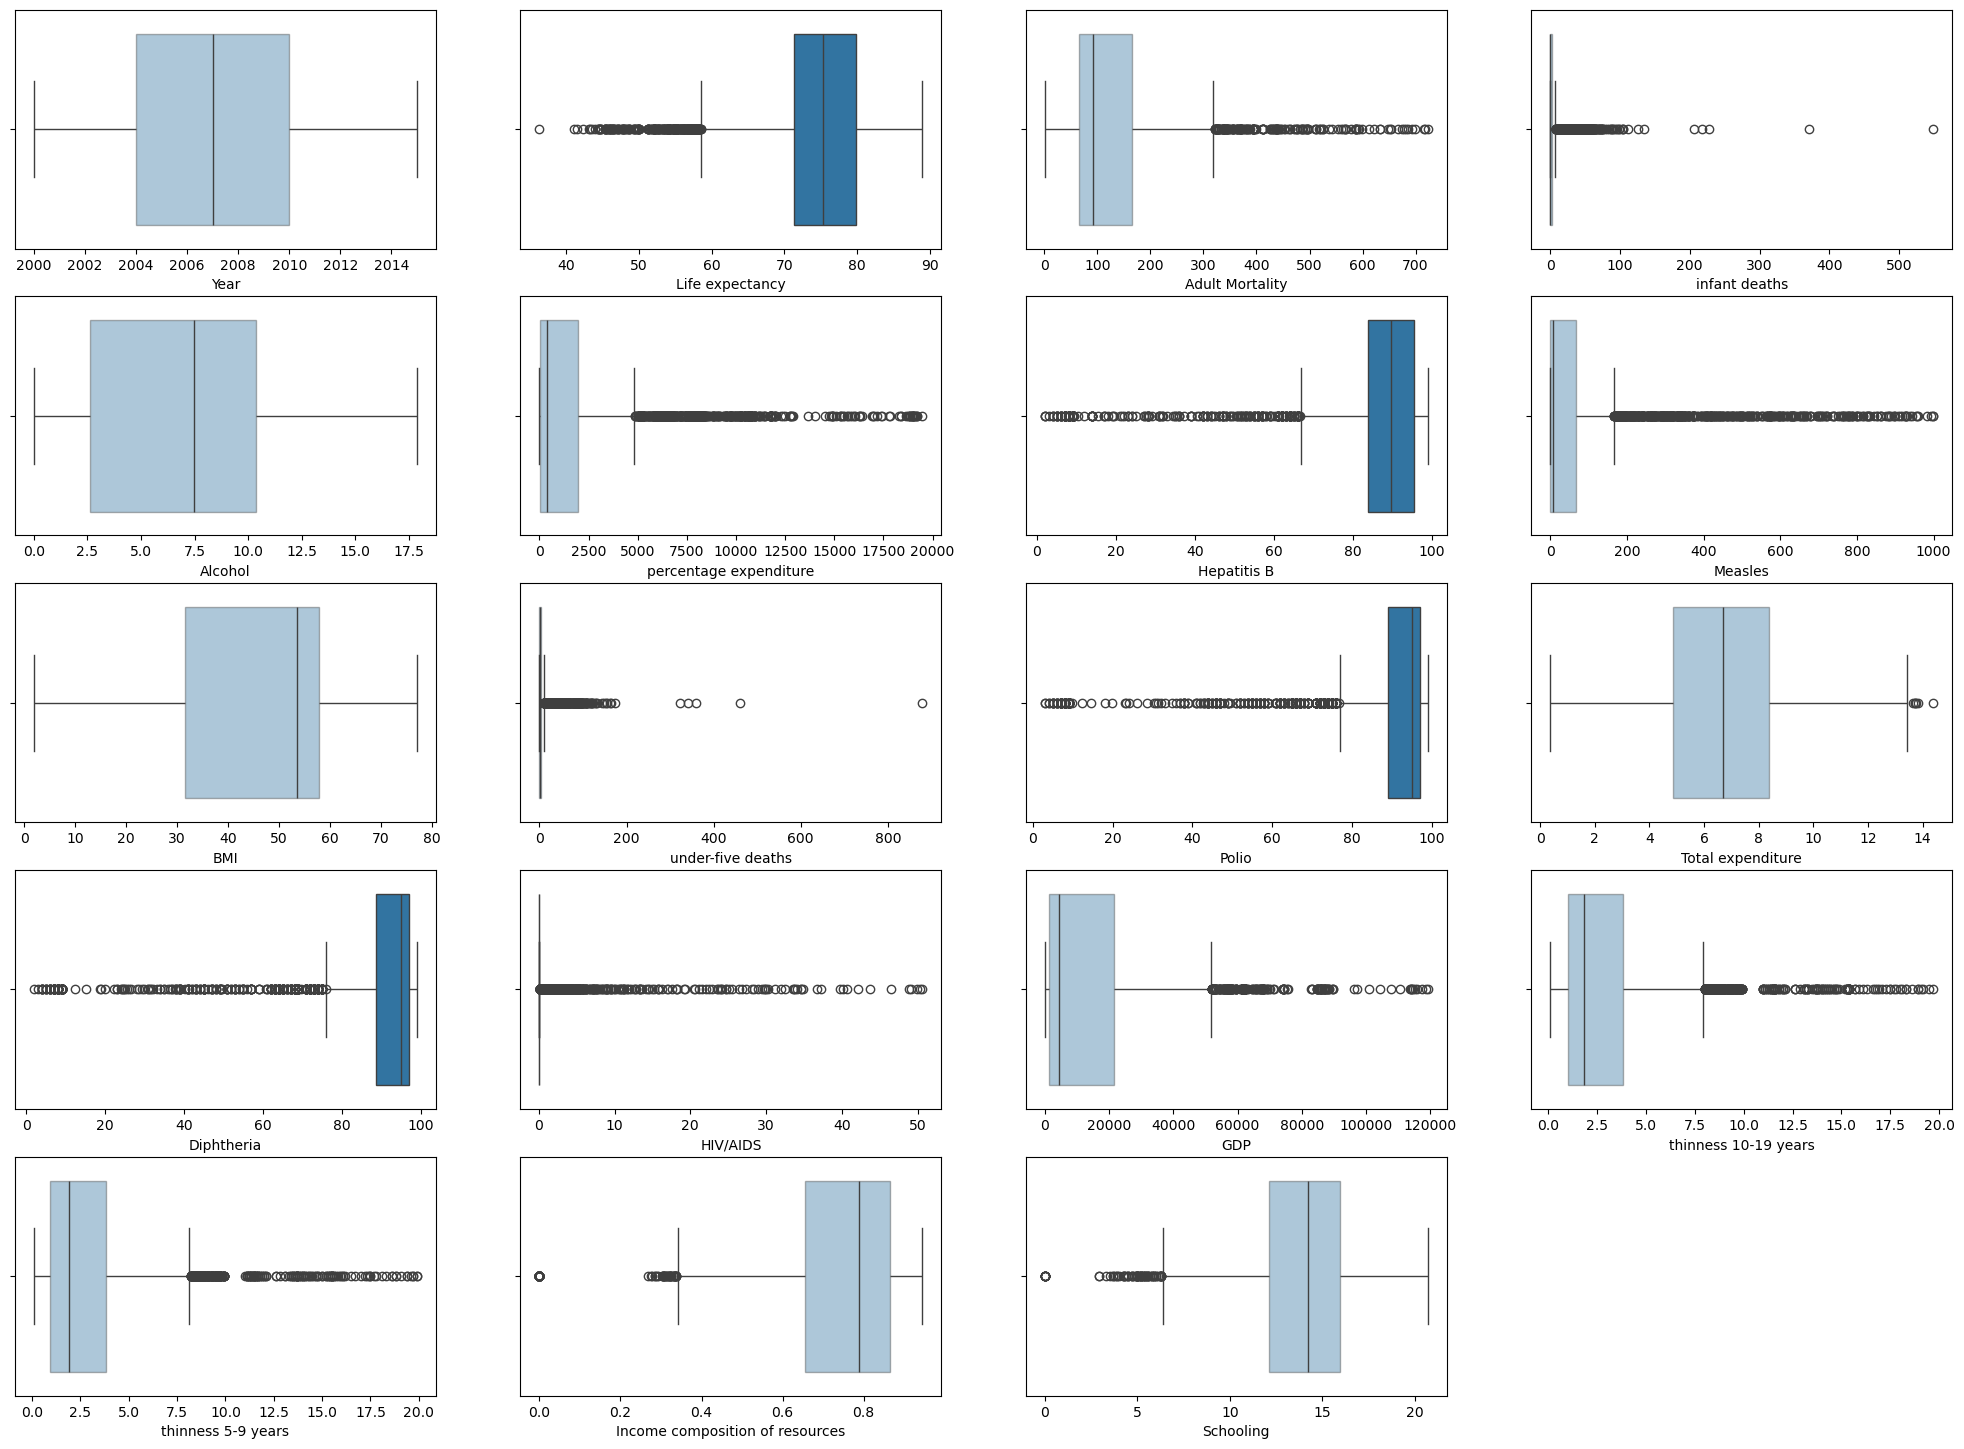

In [46]:
# Box plot resample data
fig = plt.figure(figsize=(25,18))

boxplot_index = 1 # Set the position of the subplot to 1
for col in num_cols:
    plt.subplot(5, 4, boxplot_index) # subplot(nrows, ncols, index)
    # The higher the better (Life expectancy & immunization coverage)
    if col in ['Life expectancy', 'Hepatitis B', 'Polio', 'Diphtheria']:
        boxplot = sns.boxplot(data=data_resampled, x=col, boxprops=dict(alpha=1))  # Set alpha for transparency
    else:
        boxplot = sns.boxplot(data=data_resampled, x=col, boxprops=dict(alpha=0.4))  # Set alpha for transparency
    boxplot_index += 1 # Set the position to the next one

In [47]:
data_resampled.skew(axis = 0, skipna=True, numeric_only=True).sort_values(ascending=False) # Skewness in each numeric column with ascending order

Country_Nigeria                    58.480766
Country_Thailand                   58.480766
Country_Pakistan                   58.480766
Country_Nepal                      41.333995
Country_Uganda                     33.734241
                                     ...    
Life expectancy                    -1.188092
Income composition of resources    -1.795772
Hepatitis B                        -2.845684
Diphtheria                         -3.066839
Polio                              -3.167827
Length: 187, dtype: float64

🔓**For vizualization to carry on**

In [48]:
# Add this section to visualization part if needed
# Reverse one-hot encoding for 'Country'
country_columns = [col for col in data_resampled.columns if col.startswith('Country_')]
data_resampled['Country'] = data_resampled[country_columns].idxmax(axis=1).apply(lambda x: x.split('_')[-1])
data_resampled.drop(country_columns, axis=1, inplace=True)

C:\Users\stgra\AppData\Local\Temp\ipykernel_151212\3028124058.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_resampled['Country'] = data_resampled[country_columns].idxmax(axis=1).apply(lambda x: x.split('_')[-1])


In [49]:
data_resampled

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status,Country
0,2014,59.900000,271.000000,64,0.010000,73.523582,62.000000,492,18.600000,86,...,8.180000,62.000000,0.1,612.696514,17.500000,17.500000,0.476000,10.000000,Developing,Afghanistan
1,2013,59.900000,268.000000,66,0.010000,73.219243,64.000000,430,18.100000,89,...,8.130000,64.000000,0.1,631.744976,17.700000,17.700000,0.470000,9.900000,Developing,Afghanistan
2,2004,57.000000,293.000000,87,0.020000,15.296066,67.000000,466,13.800000,120,...,8.790000,5.000000,0.1,219.141353,19.500000,19.700000,0.381000,6.800000,Developing,Afghanistan
3,2003,56.700000,295.000000,87,0.010000,11.089053,65.000000,798,13.400000,122,...,8.820000,41.000000,0.1,198.728544,19.700000,19.900000,0.373000,6.500000,Developing,Afghanistan
4,2015,77.800000,74.000000,0,4.600000,364.975229,99.000000,0,58.000000,0,...,6.000000,99.000000,0.1,3954.227830,1.200000,1.300000,0.762000,14.200000,Developing,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,2005,87.451529,73.000000,1,11.508176,4399.801147,96.388931,338,60.584973,1,...,8.272139,98.066887,0.1,28381.465156,0.646821,0.553509,0.846207,15.900000,Developed,Spain
3416,2001,80.856209,77.502044,0,9.107642,6434.911068,87.864111,451,52.265074,0,...,3.914294,92.285130,0.1,38542.556547,0.735743,0.571487,0.898366,16.022100,Developed,Norway
3417,2009,79.757875,76.684992,0,11.737467,9832.741586,87.864111,68,57.400000,0,...,5.788151,92.157504,0.1,61453.727646,0.636998,0.494874,0.908842,17.478752,Developed,Denmark
3418,2012,76.490239,120.648471,0,11.892601,1664.734548,92.403802,0,62.372355,0,...,7.709044,96.455291,0.1,13285.446772,1.609147,1.609147,0.818545,15.172765,Developed,Croatia


In [51]:
# Check after reverse the one-jpt encoding, how many Developed/Developing countries are there
country_status = data_resampled.groupby('Country')['Status'].value_counts()

# Count the total number of countries in each status group
countries_per_status = country_status.groupby('Status').size()

# Group by 'Status' and then count the number of unique countries in each group
#countries_per_status = country_status.groupby('Status').apply(lambda x: x.index.get_level_values('Country').nunique())

print(countries_per_status)

Status
Developed      29
Developing    139
Name: count, dtype: int64


🔓**For predictive model to carry on (Some hint)**

In [52]:
# Feel free to modify this code
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9970760233918129
              precision    recall  f1-score   support

   Developed       0.99      1.00      1.00       324
  Developing       1.00      0.99      1.00       360

    accuracy                           1.00       684
   macro avg       1.00      1.00      1.00       684
weighted avg       1.00      1.00      1.00       684



### Correlation

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Select numerical features for the correlation heatmap
numerical_features = [
    'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 
    'thinness 10-19 years', 'thinness 5-9 years', 'Income composition of resources', 
    'Schooling'
]

# Extract the relevant data
data_num = data_resampled[numerical_features]

# Compute the correlation matrix
correlation_matrix = data_num.corr()
print(correlation_matrix)

                                 Life expectancy  Adult Mortality  \
Life expectancy                         1.000000        -0.730801   
Adult Mortality                        -0.730801         1.000000   
infant deaths                          -0.425749         0.322878   
Alcohol                                 0.520703        -0.310699   
percentage expenditure                  0.451795        -0.303326   
Hepatitis B                             0.188789        -0.151660   
Measles                                -0.141705         0.105317   
BMI                                     0.511192        -0.386728   
under-five deaths                      -0.442853         0.336241   
Polio                                   0.394706        -0.265506   
Total expenditure                       0.278757        -0.187890   
Diphtheria                              0.379619        -0.246173   
HIV/AIDS                               -0.560682         0.544085   
GDP                               

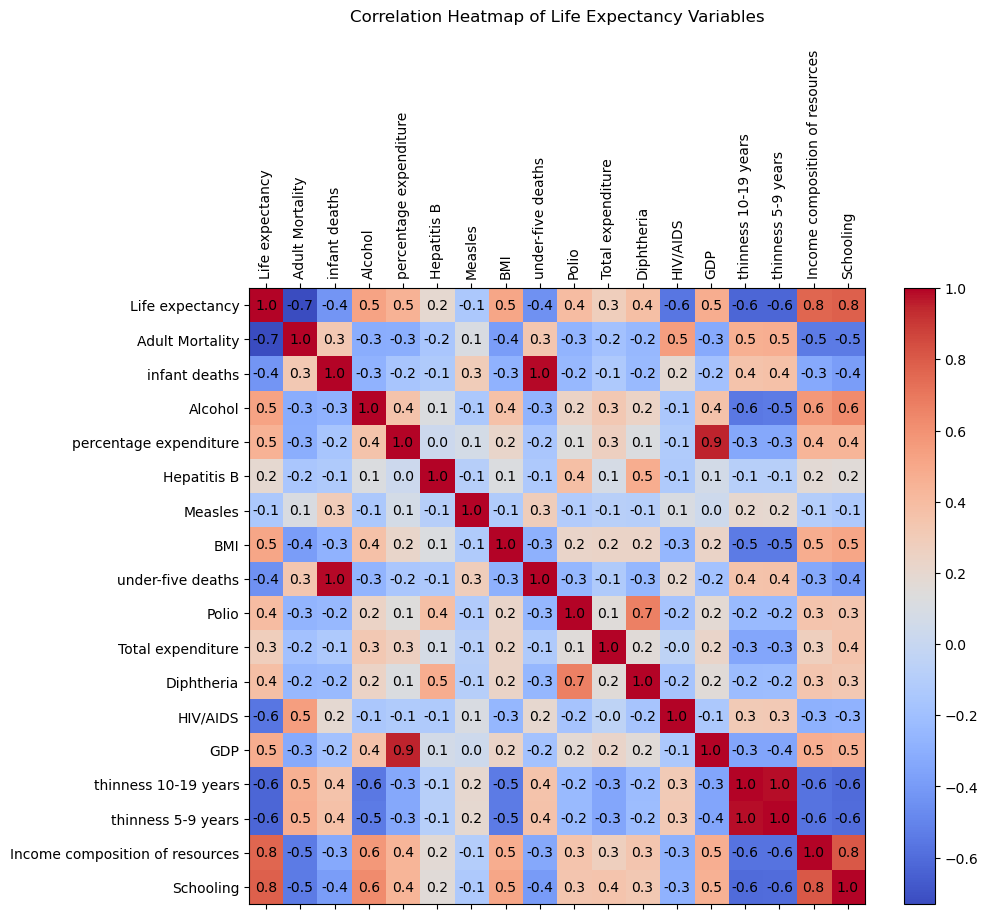

In [54]:
import numpy as np

# data_resampled
# Select numerical features for the correlation heatmap
numerical_features = [
    'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 
    'thinness 10-19 years', 'thinness 5-9 years', 'Income composition of resources', 
    'Schooling'
]

# Extract the relevant data
data_resampled_corr = data_resampled[numerical_features]

# Compute the correlation matrix
correlation_matrix = data_resampled_corr.corr()

# Plot the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add color bar
fig.colorbar(cax)

# Set axis labels
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.index)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.index)

# Add the correlation values as text
for (i, j), val in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{val:.1f}', ha='center', va='center', color='black')

plt.title("Correlation Heatmap of Life Expectancy Variables", pad=20)
plt.show()

## Data Visualization

## 1. Distribution of Life Expectancy

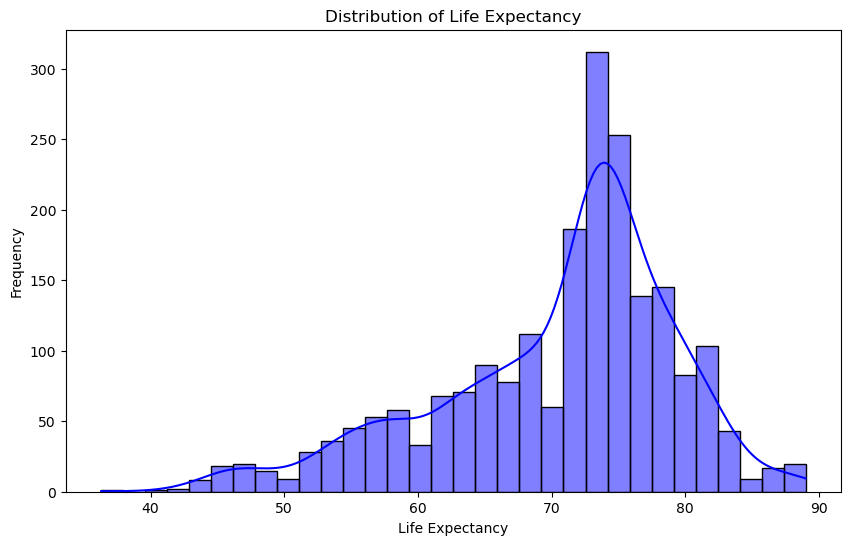

In [55]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a histogram of 'Life expectancy' with a Kernel Density Estimate (KDE) overlay
# The KDE provides a smoothed estimate of the distribution
sns.histplot(data['Life expectancy'], kde=True, color='blue')

# Set the title of the plot
plt.title('Distribution of Life Expectancy')

# Label the x-axis
plt.xlabel('Life Expectancy')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

## 2. Top 10 countries with highest life expectancy

C:\Users\stgra\AppData\Local\Temp\ipykernel_151212\520892412.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Life expectancy', y='Country', data=top_10_countries, palette='viridis')


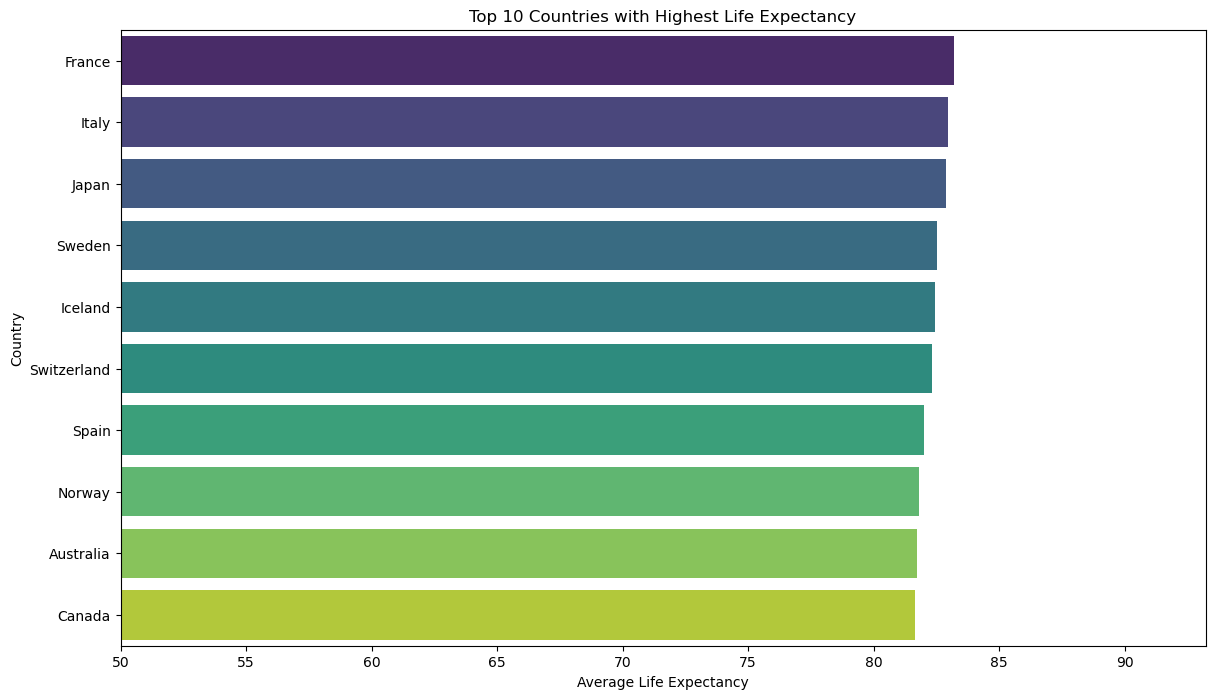

In [56]:
# Calculate the mean life expectancy for each country
country_life_expectancy = data.groupby('Country')['Life expectancy'].mean().reset_index()

# Sort the countries by life expectancy and select the top 10
top_10_countries = country_life_expectancy.nlargest(10, 'Life expectancy')

# Plot the top 10 countries with the highest life expectancy
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Life expectancy', y='Country', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries with Highest Life Expectancy')
plt.xlabel('Average Life Expectancy')
plt.ylabel('Country')

# Set the x-axis limit
plt.xlim(50, top_10_countries['Life expectancy'].max() + 10)  # Add a little padding on the upper limit

plt.show()

## 3. Average Adult Mortality Rate over the years

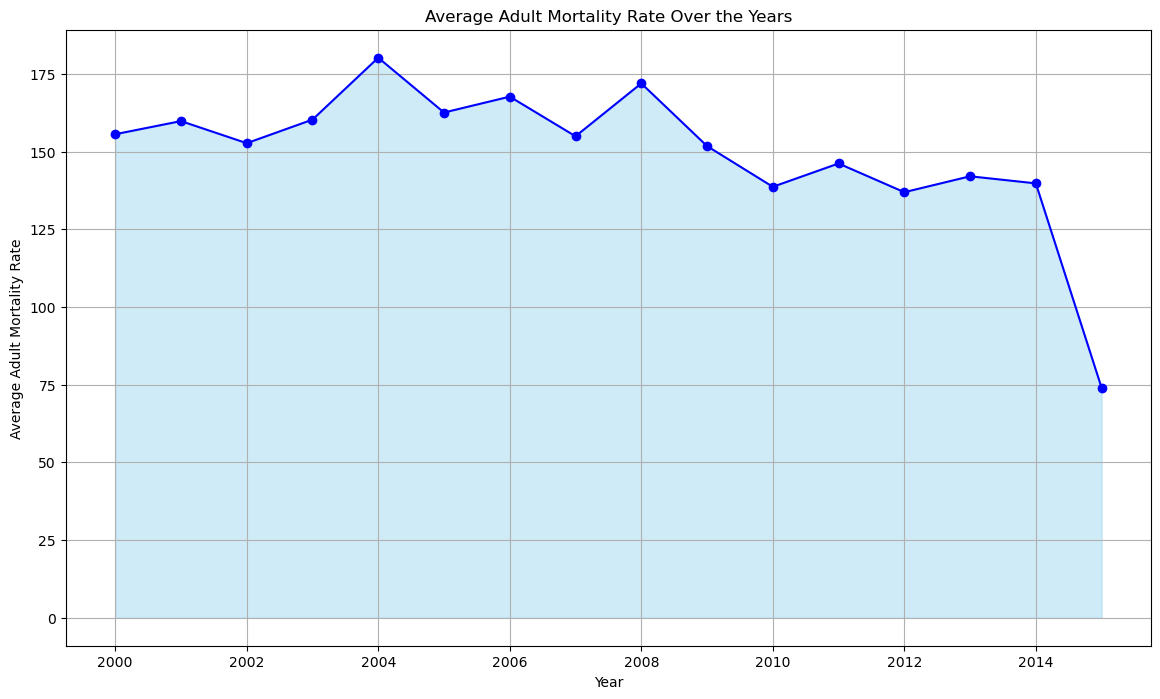

In [57]:
# Group the data by 'Year' and calculate the mean of 'Adult Mortality' for each year
grouped_data = data.groupby('Year')['Adult Mortality'].mean().reset_index()

# Set the size of the figure
plt.figure(figsize=(14, 8))

# Create an area plot by filling the area under the line plot
# 'fill_between' fills the area between the x-axis and the line representing 'Adult Mortality'
# 'alpha=0.4' sets the transparency level of the filled area to 40%
plt.fill_between(grouped_data['Year'], grouped_data['Adult Mortality'], color='skyblue', alpha=0.4)

# Plot a line chart for 'Adult Mortality' over the years
# 'marker="o"' adds a circle marker at each data point
# 'color="blue"' sets the color of the line and markers
# 'linestyle="-" ' sets the line style to a solid line
plt.plot(grouped_data['Year'], grouped_data['Adult Mortality'], marker='o', color='blue', linestyle='-')

# Set the title of the plot to describe what the chart represents
plt.title('Average Adult Mortality Rate Over the Years')

# Label the x-axis as 'Year' to indicate the time period on this axis
plt.xlabel('Year')

# Label the y-axis as 'Average Adult Mortality Rate' to indicate the average mortality rates measured
plt.ylabel('Average Adult Mortality Rate')

# Add a grid to the plot to improve readability and to make it easier to compare values
plt.grid(True)

# Display the plot
plt.show()


## 4. Comparing Mortality Rate and Life Expectancy over the decades

C:\Users\stgra\AppData\Local\Temp\ipykernel_151212\4233134937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Decade'] = (data['Year'] // 10) * 10


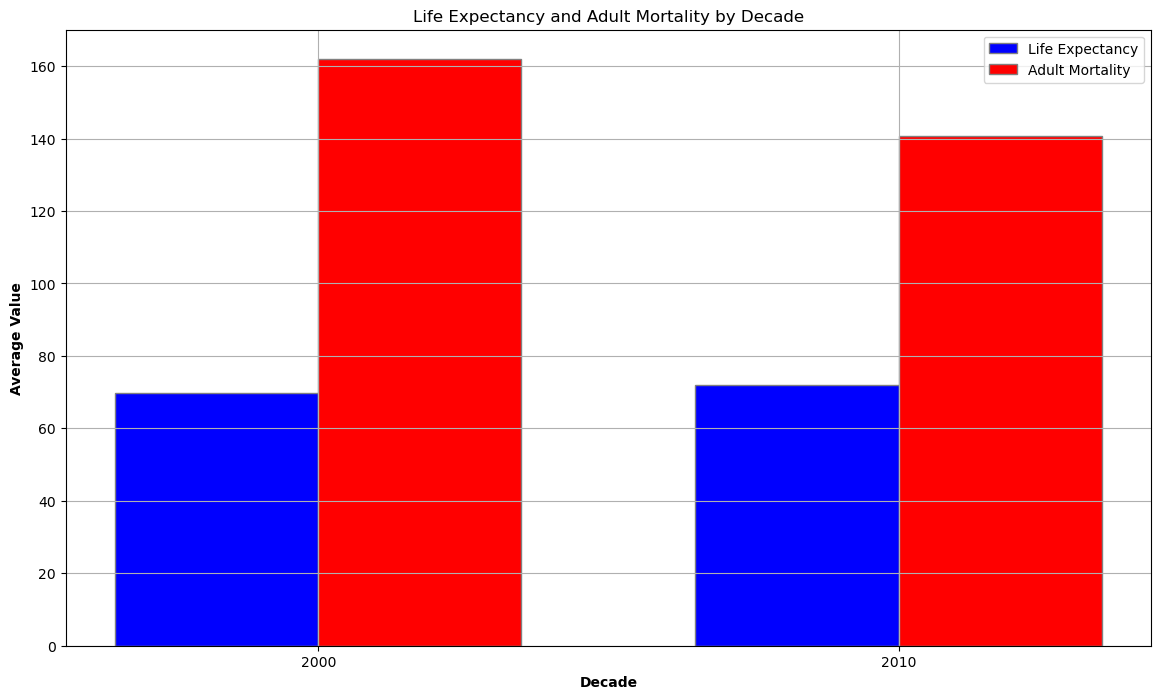

In [58]:
# Extract decade from Year
data['Decade'] = (data['Year'] // 10) * 10

# Group by Decade and calculate average Life Expectancy and Adult Mortality
decade_summary = data.groupby('Decade').agg({
    'Life expectancy': 'mean',
    'Adult Mortality': 'mean'
}).reset_index()

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.35
decades = decade_summary['Decade']
life_expectancy = decade_summary['Life expectancy']
adult_mortality = decade_summary['Adult Mortality']

# Position of bars on x-axis
r1 = range(len(decades))
r2 = [x + bar_width for x in r1]

# Create bars
ax.bar(r1, life_expectancy, color='blue', width=bar_width, edgecolor='grey', label='Life Expectancy')
ax.bar(r2, adult_mortality, color='red', width=bar_width, edgecolor='grey', label='Adult Mortality')

# Add labels
ax.set_xlabel('Decade', fontweight='bold')
ax.set_ylabel('Average Value', fontweight='bold')
ax.set_title('Life Expectancy and Adult Mortality by Decade')
ax.set_xticks([r + bar_width/2 for r in r1])
ax.set_xticklabels(decades)
ax.legend()

plt.grid(True)
plt.show()

## 5. 3D Plot of Life Expectancy, GDP and Schooling

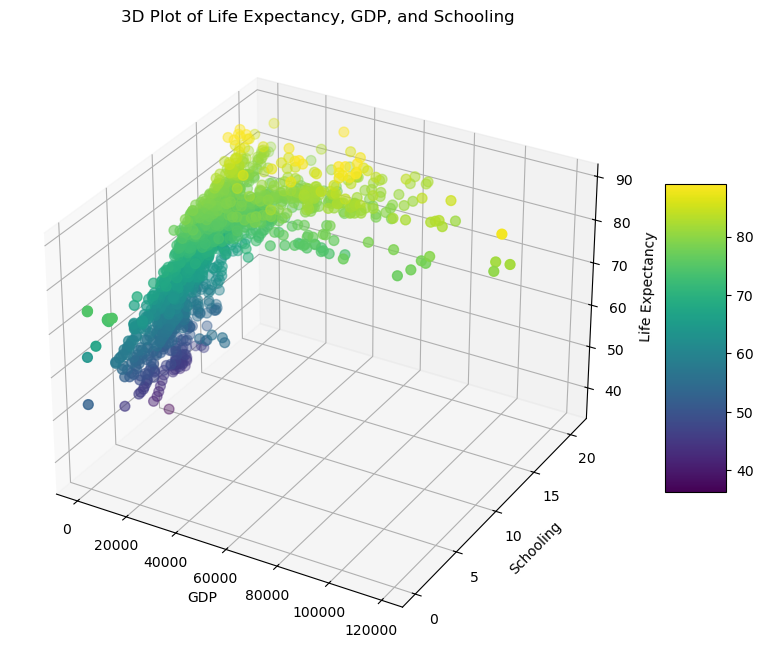

In [59]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(data['GDP'], data['Schooling'], data['Life expectancy'],
                     c=data['Life expectancy'], cmap='viridis', s=50)

ax.set_xlabel('GDP')
ax.set_ylabel('Schooling')
ax.set_zlabel('Life Expectancy')
plt.title('3D Plot of Life Expectancy, GDP, and Schooling')
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
plt.show()


C:\Users\stgra\AppData\Local\Temp\ipykernel_151212\2478520389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status', y='Life expectancy', data=data, palette='coolwarm')


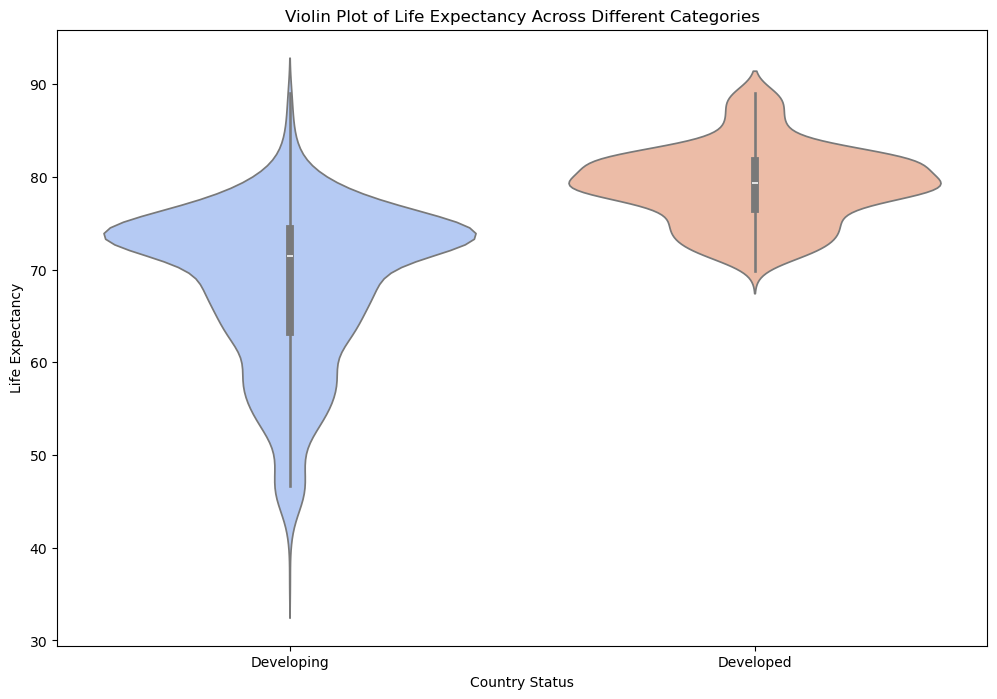

In [60]:


plt.figure(figsize=(12, 8))

# Violin plot of life expectancy by country status
sns.violinplot(x='Status', y='Life expectancy', data=data, palette='coolwarm')
plt.title('Violin Plot of Life Expectancy Across Different Categories')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.show()


## Predictive Model

### Linear Regression using All year data

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List of numerical features and target
numerical_features = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
    'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 
    'thinness 10-19 years', 'thinness 5-9 years', 'Income composition of resources', 
    'Schooling'
]
target = 'Life expectancy'

# Prepare the features and target, handling missing values
X = data_resampled[numerical_features]
y = data_resampled[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
r_squared = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r_squared:.2f}, Mean Squared Error: {mse:.2f}')


R-squared: 0.83, Mean Squared Error: 12.76


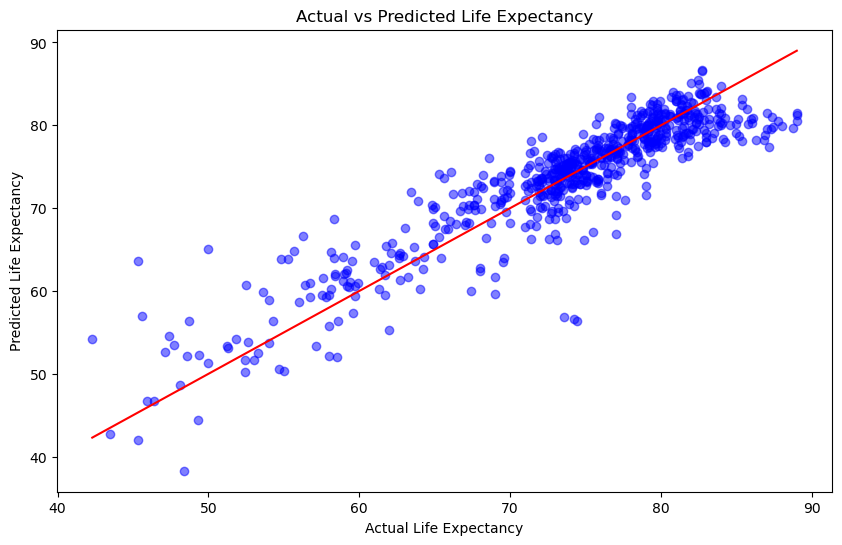

In [62]:
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()

## Performance of other Model's

In [63]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Create a Ridge regression model
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

# Train the model
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate mean squared error and R-squared
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'R-squared (Ridge): {r2_ridge}')


Mean Squared Error (Ridge): 12.76509474508809
R-squared (Ridge): 0.8273551029439182


In [64]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate mean squared error and R-squared
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')


Mean Squared Error (Lasso): 13.101322576493663
R-squared (Lasso): 0.8228077007898731


In [65]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate mean squared error and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')



Mean Squared Error (Random Forest): 2.747541910291125
R-squared (Random Forest): 0.9628401433963498


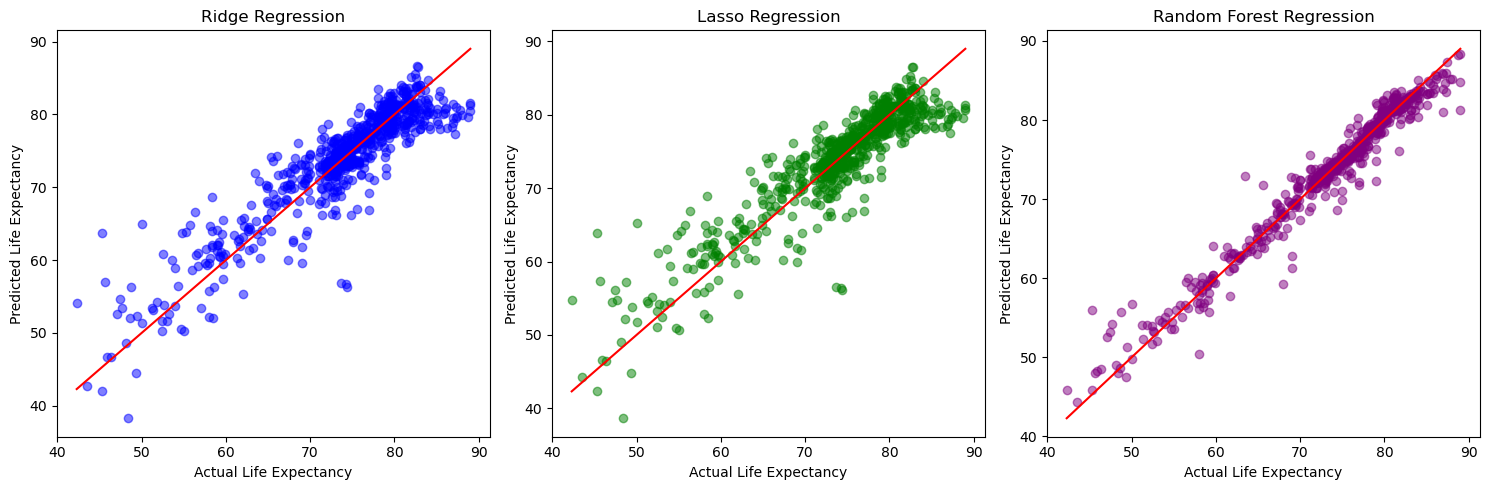

In [66]:
import matplotlib.pyplot as plt

def plot_results(y_test, y_pred_ridge, y_pred_lasso, y_pred_rf):
    plt.figure(figsize=(15, 5))

    # Ridge Regression
    plt.subplot(1, 3, 1)
    plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.xlabel('Actual Life Expectancy')
    plt.ylabel('Predicted Life Expectancy')
    plt.title('Ridge Regression')

    # Lasso Regression
    plt.subplot(1, 3, 2)
    plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='green')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.xlabel('Actual Life Expectancy')
    plt.ylabel('Predicted Life Expectancy')
    plt.title('Lasso Regression')

    # Random Forest Regression
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_pred_rf, alpha=0.5, color='purple')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.xlabel('Actual Life Expectancy')
    plt.ylabel('Predicted Life Expectancy')
    plt.title('Random Forest Regression')

    plt.tight_layout()
    plt.show()

# Plot results for each model side by side
plot_results(y_test, y_pred_ridge, y_pred_lasso, y_pred_rf)
